### Punto 1. (1.0)
Se le proporcionará un conjunto de datos llamado `medical_insurance`. Su tarea es la siguiente:

● Cargue el archivo `medical_insurance` en Google Colab.

● Realice un análisis exploratorio de los datos para entender las características y su distribución.

● Encuentre el modelo de regresión lineal múltiple entre la edad y el índice de masa corporal (BMI) con respecto a los gastos que normalmente se incurren en un hospital.

● Utilice este modelo para predecir los gastos médicos para personas con las siguientes combinaciones de edad y BMI: [20, 10], [60, 15], y [30, 19].

● Calcule el coeficiente de regresión para las variables dependientes (edad y BMI) con respecto a la variable independiente (gastos).

Se requiere el código, la gráfica de los datos y las tres predicciones, además del análisis del coeficiente de regresión.

In [75]:
import pandas as pd

df = pd.read_csv('Datasets/medical_insurance.csv')

df.head()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[['age', 'bmi']]
y = df['charges']


model = LinearRegression()

model.fit(X,y)


predicted_20_10 = model.predict([[20, 10]])
predicted_60_15 = model.predict([[60, 15]])
predicted_30_19 = model.predict([[30, 19]])

print("Gastos médicos para [20, 10]: $",predicted_20_10[0])
print("Gastos médicos para [60, 15]: $",predicted_60_15[0])
print("Gastos médicos para [30, 19]: $", predicted_30_19[0])

coefficients = model.coef_
intercept = model.intercept_

print("Coeficientes de regresión:", coefficients)
print("Intercepto:", intercept)

Gastos médicos para [20, 10]: $ 1745.8273091917945
Gastos médicos para [60, 15]: $ 13065.030394106696
Gastos médicos para [30, 19]: $ 7160.51615451109
Coeficientes de regresión: [241.28833399 333.53394504]


c:\Users\Andres Mendez\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Andres Mendez\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Andres Mendez\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Punto 3. (1.0)

Para el dataset “Position” debe realizar la regresión polinomial, graficar con su línea de
regresión, calcular el R2 score y, además, predecir los valores para la posición 17 y 11.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


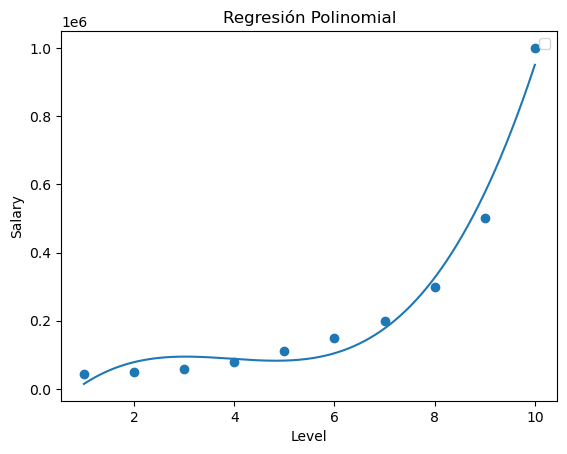

r2: 0.9812097727913367
El salario aproximado para la posicion 11: 1475333.333333333
El salario aproximado para la posicion 17: 9161102.564102551


In [57]:
import pandas as pd
import numpy
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

df = pd.read_csv('Datasets/position.csv')

df.head()

x = df['Level'].values 
y = df['Salary'].values  


mymodel = numpy.poly1d(numpy.polyfit(x, y, 3)) # Modelo polinomial de grado 3

data11 = mymodel(11) # Prediccion
data17 = mymodel(17) # Prediccion

myline = numpy.linspace(1, 10, 1000000)

plt.title('Regresión Polinomial')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))
r2 = r2_score(y, mymodel(x))
print("r2:", r2)

print("El salario aproximado para la posicion 11:", data11)
print("El salario aproximado para la posicion 17:", data17)




In [50]:
import pandas as pd

df = pd.read_csv('Datasets/diabetes.csv')

df.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [56]:
import pandas as pd
from sklearn.metrics import accuracy_score

df = pd.read_csv('Datasets/diabetes.csv')

df.head()

features = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']
label = ['Diabetic']

X = df[features].values 
y = df[label].values  

# Importamos el modelo de Regresión Logistica de la biblioteca skelearn
from sklearn import linear_model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.linear_model import LogisticRegression

reg = 0.01

model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)
#print(model) # Imprime el modelo entrenado

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)

print("Modelo entrenado:\n", model)
print("Precisión en el conjunto de prueba:", accuracy)


new_patient = [[2, 120, 70, 30, 100, 25.0, 0.5, 35]]
prediction = model.predict(new_patient)


print("Predicción para el nuevo paciente (diabético=1, no diabético=0):", prediction[0])

c:\Users\Andres Mendez\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Andres Mendez\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Modelo entrenado:
 LogisticRegression(C=100.0, solver='liblinear')
Precisión en el conjunto de prueba: 0.7888888888888889
Predicción para el nuevo paciente (diabético=1, no diabético=0): 0


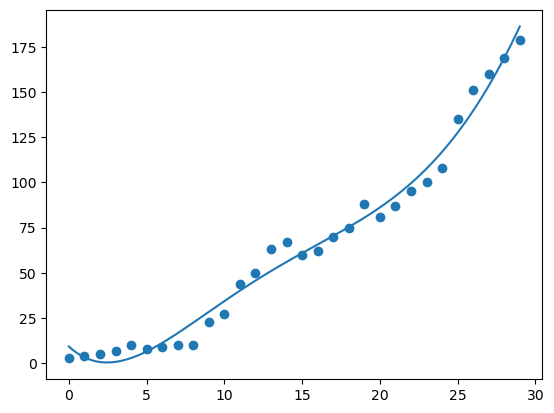

0.9845777073755907
Prediccion para el valor 22.5: 103.41437737795783
Prediccion para el valor 35: 328.784458144551
Prediccion para el valor 5.9: 10.721839775025925


In [86]:
import numpy as np
import matplotlib.pyplot as plt


x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
y = [3, 4, 5, 7, 10, 8, 9, 10, 10, 23, 27, 44, 50, 63, 67, 60, 62, 70, 75, 88, 81, 87, 95, 100, 108, 135, 151, 160, 169, 179]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 5))
myline = numpy.linspace(0, 29, 179)
plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

from sklearn.metrics import r2_score

print(r2_score(y, mymodel(x)))

# PREDECIR

pred_22_5 = mymodel(22.5)
pred_35 = mymodel(35)
pred_5_9 = mymodel(5.9)

print("Prediccion para el valor 22.5:",pred_22_5)
print("Prediccion para el valor 35:",pred_35)
print("Prediccion para el valor 5.9:",pred_5_9)